In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
 
# General libraries
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
 
# Deep learning libraries
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, LeakyReLU, Activation, Lambda, GlobalAveragePooling2D, DepthwiseConv2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Add, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
 
# Setting seeds for reproducibility
seed = 232
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
input_path = '/content/drive/My Drive/Cross Validation Data/Fold 3/' #Change it as necessary, This is the base path for data

In [4]:
# Hyperparameters
img_dims = 227
epochs = 50
batch_size = 32

In [5]:
X_train = []
X_test = []
y_train = []
y_test = []

for cond in ['/COVID19/', '/NORMAL/','/PNEUMONIA/']:
  for img_name in os.listdir(input_path+'test'+cond):
    img = cv2.imread(input_path+'test'+cond+img_name, 0)
    try:
      img = cv2.resize(img, (img_dims, img_dims))
    except:
      print(img_name)
      
      #lbp_img = local_binary_pattern(img, P=8, R=8, method='uniform')/255.0
    img = np.dstack([img, img, img])  #Feinting color image channel
    img = img.astype('float32') / 255.0
      #img = img/255.0
      
    X_test.append(img)
        
    if cond=='/COVID19/':
       label=0
       y_test.append(label)
    elif cond=='/NORMAL/':
       label=1
       y_test.append(label)
    else:
       label=2
       y_test.append(label)


X_test = np.array(X_test)

y_test = np.array(y_test)

In [6]:
print(X_test.shape)

(246, 227, 227, 3)


# **First Model to Use**

In [7]:
##########MODEL DESCRIPTION GOES HERE ###############
########### THIS IS MobileNet ########## 
 
num_classes=3
 
IMAGE_SIZE = [227,227]
mobilenet = tf.keras.applications.MobileNet(input_shape = IMAGE_SIZE + [3], weights = None ,alpha=1.0,dropout=0.001, include_top = False)
 
for layer in mobilenet.layers:
  layer.trainable=False
 
########### Make sure the Number of Dense Layers and Number of Neurons are the same as you had saved
x = Flatten()(mobilenet.output)
x=Dense(256,activation='relu')(x)
x=Dense(128,activation='relu')(x)
x=Dropout(.2)(x)
prediction = Dense(num_classes, activation='softmax')(x)

model1 = Model(inputs=mobilenet.input,outputs=prediction)

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
weight_path = '/content/drive/My Drive/Results/Weight/New_3class_Mobilenet_without_lbp_fold3_dropout_unfreeze.h5'###### Here weights of 1st viral vs bacterial model will be loaded
model1.load_weights(weight_path)
 
model_first = Model(model1.inputs, model1.output)# Here, the final dense layer is layer -1, the dropout before that is -2, then -3 and -4 and Flatten layer is -5. Take what you need.
#X_train_first = model_first.predict(X_train)
#X_test_first = model_first.predict(X_test)
 
######################### This is where we will save the predictions ################################
#save_path = '/content/drive/My Drive/'##########################
#np.save(save_path+'Train First Model.npy', X_train_first)
#np.save(save_path+'Test First Model.npy', X_test_first)

## **Second Model to Use**

In [8]:
##########MODEL DESCRIPTION GOES HERE ###############
########### THIS IS MobileNet ########## 
 
num_classes=3
 
IMAGE_SIZE = [227,227]
mobilenet2 = tf.keras.applications.DenseNet201(input_shape = IMAGE_SIZE + [3], weights = None ,include_top = False,pooling='avg')
 
for layer in mobilenet2.layers:
  layer.trainable=False

########### Make sure the Number of Dense Layers and Number of Neurons are the same as you had saved
#x = GlobalAveragePooling2D()(mobilenet2.output)
x=Dense(256,activation='relu')(mobilenet2.output)
x=Dense(128,activation='relu')(x)
x=Dropout(.2)(x)
prediction = Dense(num_classes, activation='softmax')(x)

model2 = Model(inputs=mobilenet2.input,outputs=prediction)

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
weight_path = '/content/drive/My Drive/Results/Weight/3class_densenet201_fold3_simple.h5'################################
model2.load_weights(weight_path)
 
model_second = Model(model2.inputs, model2.output)# Here, the final dense layer is layer -1, the dropout before that is -2, then -3 and -4 and Flatten layer is -5. Take what you need.
#X_train_second = model_second.predict(X_train)
#X_test_second = model_second.predict(X_test)
 
######################### This is where we will save the predictions ################################
#save_path = '/content/drive/My Drive/'##########################
#np.save(save_path+'Train Second Model.npy', X_train_second)
#np.save(save_path+'Test Second Model.npy', X_test_second)

## **Third Model to Use**


In [9]:
##########MODEL DESCRIPTION GOES HERE ###############
########### THIS IS MobileNet ########## 
 
num_classes=3
 
IMAGE_SIZE = [227,227]
mobilenet3 = tf.keras.applications.Xception(input_shape = IMAGE_SIZE + [3], weights = None ,include_top = False,pooling='avg')
 
for layer in mobilenet3.layers:
  layer.trainable=False
 
########### Make sure the Number of Dense Layers and Number of Neurons are the same as you had saved
#x = GlobalAveragePooling2D()(mobilenet3.output)
x=Dense(256,activation='relu')(mobilenet3.output)
x=Dense(128,activation='relu')(x)
x=Dropout(.2)(x)
prediction = Dense(num_classes, activation='softmax')(x)

model3 = Model(inputs=mobilenet3.input,outputs=prediction)

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
weight_path = '/content/drive/My Drive/Results/Weight/3class_xception_fold3_simple.h5'################################
model3.load_weights(weight_path)
 
model_third = Model(model3.inputs, model3.output)# Here, the final dense layer is layer -1, the dropout before that is -2, then -3 and -4 and Flatten layer is -5. Take what you need.


## **Fourth Model to Use**

In [10]:
##########MODEL DESCRIPTION GOES HERE ###############
########### THIS IS MobileNet(4th model) ########## 
 
num_classes=3
 
IMAGE_SIZE = [227,227]
mobilenet4 = tf.keras.applications.InceptionV3(input_shape = IMAGE_SIZE + [3], weights = None ,include_top=False,pooling='avg')
 
for layer in mobilenet4.layers:
  layer.trainable=False
 
########### Make sure the Number of Dense Layers and Number of Neurons are the same as you had saved
#x = GlobalAveragePooling2D()(mobilenet.output)
x=Dense(256,activation='relu')(mobilenet4.output)
x=Dense(128,activation='relu')(x)
x=Dropout(.2)(x)
prediction = Dense(num_classes, activation='softmax')(x)

model4 = Model(inputs=mobilenet4.input,outputs=prediction)

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
weight_path = '/content/drive/My Drive/Results/Weight/NORMAL 3 CLASS INCEPTION FOLD 3.h5'################################
model4.load_weights(weight_path)
 
model_fourth = Model(model4.inputs, model4.output)# Here, the final dense layer is layer -1, the dropout before that is -2, then -3 and -4 and Flatten layer is -5. Take what you need.


## **THIS IS Fifth MODEL**

In [11]:
num_classes=3
 
IMAGE_SIZE = [227,227]
mobilenet5 = tf.keras.applications.DenseNet121(input_shape = IMAGE_SIZE + [3], weights = None ,include_top = False,pooling='avg')
 
for layer in mobilenet5.layers:
  layer.trainable=False

########### Make sure the Number of Dense Layers and Number of Neurons are the same as you had saved
#x = GlobalAveragePooling2D()(mobilenet2.output)
x=Dense(256,activation='relu')(mobilenet5.output)
x=Dense(128,activation='relu')(x)
x=Dropout(.2)(x)
prediction = Dense(num_classes, activation='softmax')(x)

model5 = Model(inputs=mobilenet5.input,outputs=prediction)

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
weight_path = '/content/drive/My Drive/Results/Weight/3class_densenet121_fold3_simple.h5'################################
model5.load_weights(weight_path)
 
model_fifth = Model(model5.inputs, model5.output)# Here, the final dense layer is layer -1, the dropout before that is -2, then -3 and -4 and Flatten layer is -5. Take what you need.


In [12]:
model_name = 'Ensembel_3class_Fold3_decision_fusion'#########################################################################

weight_save_path = '/content/drive/My Drive/Results/Weight/'



In [13]:
from sklearn.metrics import classification_report
X_tra=np.ones((246,5))
y_pred1 = model_first.predict(X_test)
y_pred2 = model_second.predict(X_test)
y_pred3 = model_third.predict(X_test)
y_pred4 = model_fourth.predict(X_test)
y_pred5 = model_fifth.predict(X_test)
#X_train1 = np.concatenate((y_pred1, y_pred2,y_pred3), axis=1)
y_pred_bool1 = np.argmax(y_pred1, axis=1)
y_pred_bool2 = np.argmax(y_pred2, axis=1)
y_pred_bool3 = np.argmax(y_pred3, axis=1)
y_pred_bool4 = np.argmax(y_pred4, axis=1)
y_pred_bool5 = np.argmax(y_pred5, axis=1)
for i in range(len(y_pred_bool1)):
  X_tra[i]=[y_pred_bool1[i], y_pred_bool2[i],y_pred_bool3[i],y_pred_bool4[i],y_pred_bool5[i]]
#print(np.unique(y_pred_bool))
X_tra.shape
#report = classification_report(y_test, y_pred_bool, output_dict=True)
#print(classification_report(y_test, y_pred_bool))

(246, 5)

In [14]:
import statistics 
from statistics import mode 
y_pred_bool=np.ones((246,1))

for i in range(len(X_tra)):
  try:
    y_pred_bool[i]=mode(X_tra[i])
  except:
    print(i)
    if X_tra[i][0]==X_tra[i][1]:
      y_pred_bool[i]=X_tra[i][1]
    elif X_tra[i][0]==X_tra[i][2]:
      y_pred_bool[i]=X_tra[i][2] 
    elif X_tra[i][0]==X_tra[i][3]:
      y_pred_bool[i]=X_tra[i][3]
    elif X_tra[i][0]==X_tra[i][4]:
      y_pred_bool[i]=X_tra[i][4]
    





print(np.unique(y_pred_bool))

report = classification_report(y_test, y_pred_bool, output_dict=True)
print(classification_report(y_test, y_pred_bool))


[0. 1. 2.]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.94      0.96      0.95        82
           2       0.96      0.93      0.94        82

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



In [15]:

from tensorflow.keras.utils import plot_model

############## Make Sure to Change this ####################
plot_save_path = '/content/drive/My Drive/Results/ModelPlot/'
hist_save_path = '/content/drive/My Drive/Results/History/'
result_save_path = '/content/drive/My Drive/Results/Result/'
confusion_matrix_save_path = '/content/drive/My Drive/Results/Confusion Matrix/'




result_df = report
result_df = pd.DataFrame(result_df).transpose()

print(result_df)

result_df.to_csv(result_save_path+model_name+'_result.csv')

              precision    recall  f1-score     support
0              0.987952  1.000000  0.993939   82.000000
1              0.940476  0.963415  0.951807   82.000000
2              0.962025  0.926829  0.944099   82.000000
accuracy       0.963415  0.963415  0.963415    0.963415
macro avg      0.963484  0.963415  0.963282  246.000000
weighted avg   0.963484  0.963415  0.963282  246.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CONFUSION MATRIX ------------------


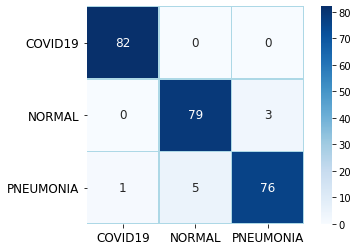

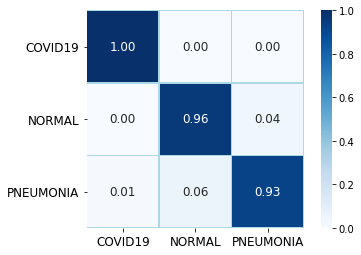

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
from seaborn import heatmap
from matplotlib import pyplot as plt

#preds = np.argmax(models.predict(X_test), axis=1)
acc = accuracy_score(y_test, np.round(y_pred_bool))*100
cm = confusion_matrix(y_test, np.round(y_pred_bool))
cm_norm = confusion_matrix(y_test, np.round(y_pred_bool), normalize='true')
#tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')

ax = heatmap(cm, cmap='Blues', linecolor='lightblue',linewidths=.5,annot=True,annot_kws={'size': 12}, xticklabels=['COVID19', 'NORMAL','PNEUMONIA'], yticklabels=['COVID19', 'NORMAL','PNEUMONIA'], square=True, fmt='d')

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12,rotation=0)

plt.savefig(confusion_matrix_save_path+model_name+'.png',dpi=300)
plt.show()

ax = heatmap(cm_norm, cmap='Blues', annot=True,linecolor='lightblue',linewidths=.5,annot_kws={'size': 12}, xticklabels=['COVID19', 'NORMAL','PNEUMONIA'], yticklabels=['COVID19', 'NORMAL','PNEUMONIA'], square=True, fmt='.2f')

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12,rotation=0)

plt.savefig(confusion_matrix_save_path+model_name+'_normalized.png',dpi=300)